#Data Wrangling/Machine learning with SparkR

SparkR allows data scientists to do seamless manipulation and analysis of very large data in R, through exposing existing Spark functionality in an R friendly syntax via the DataFrame API. Without learning a new programming paradigm when working with Spark


##loading libraries

The package SparkRext was created to make SparkR closer to dplyr.


In [1]:
library(dplyr)
library("SparkR", lib.loc="C:\\spark-1.5.0\\R\\lib") 
library(SparkRext)

Warning message:
: package 'dplyr' was built under R version 3.2.2
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
: package 'SparkR' was built under R version 3.2.1
Attaching package: 'SparkR'

The following objects are masked from 'package:dplyr':

    arrange, between, collect, count, desc, distinct, explain, filter,
    first, group_by, intersect, last, mutate, n, n_distinct, rename,
    sample_frac, select, sql, summarize

The following objects are masked from 'package:stats':

    filter, na.omit

The following objects are masked from 'package:base':

    intersect, rbind, sample, subset, summary, table, transform


Attaching package: 'SparkRext'

The following objects are masked from 'package:SparkR':

    arrange, filter, group_by, mutate, select, summarize

The following objects are masked from 'package:dplyr':

 

##Initialize Spark context

The entry point into SparkR is to initialize a SparkContext through sparkR.init() which connects your R program to a Spark cluster. Note spark context once created is immutable.if you want to create a new spark context then you will have to remove or destroy the previous spark context.

In [2]:
sc = sparkR.init(master="local[4]",sparkHome ="C:\\spark-1.5.0",sparkEnvir=list(spark.executor.memory="2g"))
 # where index 4 refers to number of CPU cores
sqlContext = sparkRSQL.init(sc) # here I create  a SqlContext

Launching java with spark-submit command C:\spark-1.5.0/bin/spark-submit.cmd   sparkr-shell C:\Users\Samuel\AppData\Local\Temp\Rtmp0QXtcv\backend_port150cf755106 


##Connecting to SQL server

The function loadDF by default create's a DataFrame.

In [3]:
df =  loadDF(sqlContext,source="jdbc", url="jdbc:sqlserver://SHAMIRI;databaseName=test;integratedSecurity=true;",
             dbtable="dbo.ss13husa",
             partitionColumn="ID",
             lowerBound = "0", 
             upperBound = "55", 
             numPartitions = "15")  # lazy (no print out)


In [3]:
tmp = read.df(sqlContext,"C:/Users/Samuel/Spark training/housing.json", source = "json") # DataFrame from json

In [6]:
showDF(tmp)

+----+----+----+----+----+------+----+-----+---+----+
|BEDS|ELEP|GASP|  ID|INSP| PRICE|SIZE|STATE|SUB|TAXP|
+----+----+----+----+----+------+----+-----+---+----+
|null|null|null|  84|null|  null|null|    3|  1|null|
|   9| 350|   3| 154| 350| 25000|   1|    3|  1|   3|
|   6| 300|   3| 156| 980| 80000|   1|    3|  1|   6|
|   6| 220|  20| 160|null|  null|   3|    3|  1|null|
|   3|  60|   3| 231|null|  null|null|    3|  1|null|
|   9| 100|  90| 286|  50| 18000|   1|    3|  1|   3|
|  17| 240|   3| 312|2200|390000|   1|    3|  1|  26|
|   5| 130|  40| 316|1700|120000|   2|    3|  1|   5|
|   2| 130|   3| 335|null|  null|null|    3|  1|null|
|   8|  80| 280| 447|1200|160000|   2|    3|  1|  10|
|null|null|null| 557|null|  null|null|    3|  1|null|
|   4|  90|   3| 588|null|  null|   1|    3|  1|null|
|   5| 100|  30| 709|null|  null|   2|    3|  1|null|
|   4| 100|   3| 732|null|  null|null|    3|  1|null|
|   6| 190|   3| 776| 600| 40000|   2|    3|  1|   2|
|   4| 300|   3| 891| 900| 6

In [11]:
tmp = tmp %>%repartition(10) %>%cache # change the number of partition
tmp %>% nrow

[1] 756065

In [4]:
showDF(tmp)

+----+----+----+----+----+------+----+-----+---+----+
|BEDS|ELEP|GASP|  ID|INSP| PRICE|SIZE|STATE|SUB|TAXP|
+----+----+----+----+----+------+----+-----+---+----+
|null|null|null|  84|null|  null|null|    3|  1|null|
|   9| 350|   3| 154| 350| 25000|   1|    3|  1|   3|
|   6| 300|   3| 156| 980| 80000|   1|    3|  1|   6|
|   6| 220|  20| 160|null|  null|   3|    3|  1|null|
|   3|  60|   3| 231|null|  null|null|    3|  1|null|
|   9| 100|  90| 286|  50| 18000|   1|    3|  1|   3|
|  17| 240|   3| 312|2200|390000|   1|    3|  1|  26|
|   5| 130|  40| 316|1700|120000|   2|    3|  1|   5|
|   2| 130|   3| 335|null|  null|null|    3|  1|null|
|   8|  80| 280| 447|1200|160000|   2|    3|  1|  10|
|null|null|null| 557|null|  null|null|    3|  1|null|
|   4|  90|   3| 588|null|  null|   1|    3|  1|null|
|   5| 100|  30| 709|null|  null|   2|    3|  1|null|
|   4| 100|   3| 732|null|  null|null|    3|  1|null|
|   6| 190|   3| 776| 600| 40000|   2|    3|  1|   2|
|   4| 300|   3| 891| 900| 6

In [4]:
df %>% nrow

[1] 756065

In [4]:
df2 =  loadDF(sqlContext,source="jdbc", url="jdbc:sqlserver://SHAMIRI;databaseName=test;integratedSecurity=true;",
             dbtable="dbo.ss13husb",
             partitionColumn="ID",
             lowerBound = "0", 
             upperBound = "55", 
             numPartitions = "5")
df2 %>% nrow

[1] 720248

In [5]:
tmp = collect(df) ## convert into R data.frame

In [6]:
class(tmp)

[1] "data.frame"

## DataFrame operations

In [5]:
dat = rbind(df, df2) # bind rows
printSchema(dat)

root
 |-- ID: integer (nullable = true)
 |-- PRICE: integer (nullable = true)
 |-- BEDS: integer (nullable = true)
 |-- SIZE: integer (nullable = true)
 |-- INSP: integer (nullable = true)
 |-- TAXP: integer (nullable = true)
 |-- ELEP: integer (nullable = true)
 |-- GASP: integer (nullable = true)
 |-- SUB: integer (nullable = true)
 |-- STATE: integer (nullable = true)


In [7]:
dat %>% nrow

[1] 1476313

In [8]:
dat %>% head

,ID,PRICE,BEDS,SIZE,INSP,TAXP,ELEP,GASP,SUB,STATE
1,5,90000,6,1,500,12,70,50,8,4
2,2,260000,7,2,1500,42,250,3,10,3
3,7,NA,4,NA,NA,NA,1,3,11,3
4,1,180000,5,1,900,29,150,3,12,3
5,4,130000,4,NA,990,25,50,3,12,3
6,9,1571000,8,1,2500,66,110,160,19,2


In [9]:
dat = dropna(dat)  # Remove na's
dat %>% nrow

[1] 807202

### select( ), group_by( ) and summarize( )

use the : colon to select multiple contiguous columns, and use contains to match columns by name or use starts_with, ends_with, and matches (for regular expressions) can also be used to match columns by name

In [10]:
dat %>% select(BEDS,contains('P')) %>%       
        group_by(BEDS) %>% 
        summarize(AvgPrice = mean(PRICE),AvgElec = mean(ELEP),MaxTax=max(TAXP),MinGas=min(GASP)) %>%
        head

,BEDS,AvgPrice,AvgElec,MaxTax,MinGas
1,1,171098.9,124.2177,68,1
2,2,146279.7,97.66547,68,1
3,3,136767.1,114.0797,68,1
4,4,145628.9,121.6535,68,1
5,5,164915,132.4505,68,1
6,6,198346.6,142.0432,68,1


## Preparing a train / test data split

In [10]:
dat$SUB = cast(dat$SUB, "string") # convert to character

In [11]:
dat$STATE = cast(dat$STATE, "string")

In [14]:
testDF = sample(dat,FALSE,0.1)
testDF %>% nrow

[1] 80300

In [16]:
testIDs = testDF %>% select(ID) %>% collect

In [17]:
dat = dat %>% mutate(IS_TEST = ID %in% testIDs$ID)
dat %>% head

,ID,PRICE,BEDS,SIZE,INSP,TAXP,ELEP,GASP,SUB,STATE,IS_TEST
1,5,90000,6,1,500,12,70,50,8,4,FALSE
2,2,260000,7,2,1500,42,250,3,10,3,FALSE
3,1,180000,5,1,900,29,150,3,12,3,FALSE
4,9,1571000,8,1,2500,66,110,160,19,2,FALSE
5,3,10000,5,1,0,1,140,3,22,3,FALSE
6,8,300000,1,2,0,48,170,20,28,3,FALSE


In [18]:
trainDF = dat %>% filter(IS_TEST==FALSE)
trainDF %>% nrow

[1] 726902

In [19]:
model = glm(
    PRICE ~ BEDS + SIZE + INSP + TAXP + ELEP + GASP + SUB + STATE, 
    data = trainDF, 
    family = "gaussian")

In [21]:
model %>% summary

,Estimate
(Intercept),-72486.74
BEDS,14311.16
SIZE,31536.88
INSP,100.0333
TAXP,5619.23
ELEP,193.8139
GASP,234.1955
SUB__6,82465.79
SUB__48,-431315
SUB__12,-382385.9


##Evaluating our model using the test data

In [37]:
Price_Avg = trainDF %>% select(PRICE) %>% 
            summarize(Price_Avg= mean(PRICE)) %>%
            collect %>% 
            unlist(use.names = FALSE)
Price_Avg

[1] 245393.7

In [48]:
preds = model %>% predict(newData = testDF)
preds %>% showDF

+-----+------+----+----+----+----+----+----+---+-----+--------------------+--------+------------------+
|   ID| PRICE|BEDS|SIZE|INSP|TAXP|ELEP|GASP|SUB|STATE|            features|   label|        prediction|
+-----+------+----+----+----+----+----+----+---+-----+--------------------+--------+------------------+
|   43|100000|   7|   1|  30|  13|  70|  80|  5|    3|(59,[0,1,2,3,4,5,...|100000.0| 29514.62483082339|
| 2383| 70000|   6|   1| 600|   1| 110|   3|  1|    3|(59,[0,1,2,3,4,5,...| 70000.0| 17453.29826252308|
| 3897| 65000|   8|   2| 770|   5| 130|   3|  1|    3|(59,[0,1,2,3,4,5,...| 65000.0|120971.35856698029|
| 4619| 35000|   5|   1|   0|   7| 100| 240|  1|    3|(59,[0,1,3,4,5,27...| 35000.0|30403.741675292986|
| 4635|125000|   6|   2| 820|   1| 110|  30|  1|    3|(59,[0,1,2,3,4,5,...|125000.0| 77320.78375800938|
| 4656|217000|   9|   1| 560|  20| 180|   3|  1|    3|(59,[0,1,2,3,4,5,...|217000.0|176717.79369352042|
| 7318|300000|   7|   1|1000|  22| 350| 100|  1|    3|(59,[0,1,2

## R-squared

 
 R-squared = 1 -SS_res/SS_tot

In [66]:
predictions = preds %>% select(PRICE,prediction) %>% mutate(S_res = (PRICE - prediction)^2, S_tot = (PRICE - Price_Avg)^2)
predictions %>% head

,PRICE,prediction,res,tot
1,100000,29514.62,4968188113,21139339802
2,70000,17453.3,2761155863,30762964237
3,65000,120971.4,3132792980,32541901643
4,35000,30403.74,21125591,44265526078
5,125000,77320.78,2273307661,14494652772
6,217000,176717.8,1622656145,806204505


In [62]:
residuals =  predictions %>% select(res,tot) %>%
             summarize(SS_res=sum(S_res),
                       SS_tot=sum(S_tot)) %>% 
             collect

In [63]:
residuals

,SS_res,SS_tot
1,5.181515e+15,8.642324e+15


In [64]:
Rsquared = 1.0 - (residuals$SS_res/residuals$SS_tot)
Rsquared

[1] 0.4004489

In [7]:
library(ggplot2)

Warning message:
: package 'ggplot2' was built under R version 3.2.1

In [6]:
aggDF = dat %>%
  group_by(STATE, SUB) %>%
  summarise(n = n(PRICE), AvgPrice = mean(PRICE)) %>%
  collect()

In [41]:
head(aggDF)

,STATE,SUB,n,AvgPrice
1,4,2,1423,237630.2
2,1,33,3932,270794.7
3,4,4,16888,221260.3
4,1,34,20930,381330.8
5,4,6,73659,494045.9
6,2,20,8457,141632.5


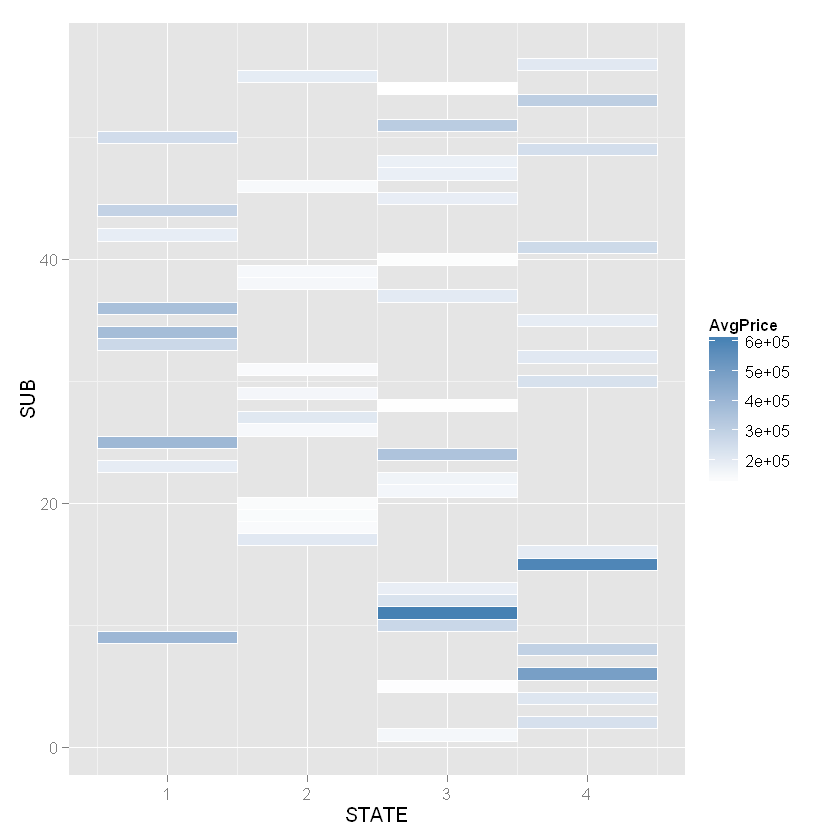

In [10]:
aggDF %>%  
  ggplot(aes(STATE, SUB, fill = AvgPrice)) +
  geom_tile(colour = "white") +
  scale_fill_gradient(low = "white", high = "steelblue")

In [ ]:
sparkR.stop()